# Data Shark - Data Generation

In [11]:
from datetime import datetime, timedelta, time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Constants
N_SAMPLES = 2000
N_CUSTOMERS = 500 

## E-commerce Fashion

In [3]:
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = (end_date - start_date).days
dates = [start_date + timedelta(days=x) for x in range(date_range)]
dates = sorted(np.random.choice(dates, size=N_SAMPLES))

# Generate customer IDs with buying patterns
customer_ids = [f'CUST_{i:04d}' for i in range(1, N_CUSTOMERS + 1)]
customer_profiles = {
    cid: {
        'price_sensitivity': np.random.choice(['low', 'medium', 'high'], p=[0.2, 0.5, 0.3]),
        'size_preference': np.random.choice(['P', 'M', 'G', 'GG'], p=[0.2, 0.4, 0.3, 0.1]),
        'favorite_categories': np.random.choice(
            ['Vestidos', 'Calças', 'Blusas', 'Saias', 'Acessórios'],
            size=np.random.randint(1, 4),
            replace=False
        ),
        'return_tendency': np.random.choice(['low', 'medium', 'high'], p=[0.7, 0.2, 0.1])
    }
    for cid in customer_ids
}

# Categories and subcategories with price ranges and margins
categories_info = {
    'Vestidos': {
        'subcategories': {
            'Casual': {'price_range': (89.90, 199.90), 'margin': 0.45},
            'Festa': {'price_range': (299.90, 599.90), 'margin': 0.55},
            'Praia': {'price_range': (79.90, 149.90), 'margin': 0.50}
        },
        'sizes': ['P', 'M', 'G'],
        'popular_colors': ['Preto', 'Vermelho', 'Rosa', 'Azul']
    },
    'Calças': {
        'subcategories': {
            'Jeans': {'price_range': (129.90, 299.90), 'margin': 0.48},
            'Social': {'price_range': (159.90, 349.90), 'margin': 0.52},
            'Moletom': {'price_range': (89.90, 179.90), 'margin': 0.45}
        },
        'sizes': ['P', 'M', 'G', 'GG'],
        'popular_colors': ['Azul', 'Preto', 'Branco']
    },
    'Blusas': {
        'subcategories': {
            'T-shirt': {'price_range': (49.90, 119.90), 'margin': 0.42},
            'Social': {'price_range': (119.90, 249.90), 'margin': 0.48},
            'Moletom': {'price_range': (99.90, 199.90), 'margin': 0.45}
        },
        'sizes': ['P', 'M', 'G', 'GG'],
        'popular_colors': ['Branco', 'Preto', 'Rosa', 'Azul']
    },
    'Saias': {
        'subcategories': {
            'Mini': {'price_range': (79.90, 179.90), 'margin': 0.47},
            'Midi': {'price_range': (119.90, 249.90), 'margin': 0.50},
            'Longa': {'price_range': (149.90, 299.90), 'margin': 0.52}
        },
        'sizes': ['P', 'M', 'G'],
        'popular_colors': ['Preto', 'Rosa', 'Azul', 'Vermelho']
    },
    'Acessórios': {
        'subcategories': {
            'Bolsas': {'price_range': (159.90, 459.90), 'margin': 0.55},
            'Cintos': {'price_range': (49.90, 149.90), 'margin': 0.50},
            'Bijuterias': {'price_range': (29.90, 99.90), 'margin': 0.60}
        },
        'sizes': ['Único'],
        'popular_colors': ['Preto', 'Marrom', 'Dourado', 'Prata']
    }
}

# Seasonal preferences (weights for different months)
seasonal_preferences = {
    'Vestidos': {
        'weights': [0.6, 0.6, 0.8, 1.0, 1.2, 1.0, 1.0, 1.2, 1.0, 0.8, 0.6, 0.8]  # Higher in spring/summer
    },
    'Calças': {
        'weights': [1.2, 1.0, 0.8, 0.6, 0.6, 0.8, 0.8, 0.6, 0.8, 1.0, 1.2, 1.2]  # Higher in fall/winter
    },
    'Blusas': {
        'weights': [1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0]  # Fairly consistent
    },
    'Saias': {
        'weights': [0.6, 0.6, 0.8, 1.0, 1.2, 1.2, 1.2, 1.2, 1.0, 0.8, 0.6, 0.6]  # Higher in summer
    },
    'Acessórios': {
        'weights': [0.8, 0.8, 1.0, 1.2, 1.2, 1.4, 1.4, 1.4, 1.2, 1.0, 1.0, 1.4]  # Higher in summer/holidays
    }
}

def generate_price(category, subcategory, customer_profile):
    base_range = categories_info[category]['subcategories'][subcategory]['price_range']
    
    # Adjust price based on customer price sensitivity
    if customer_profile['price_sensitivity'] == 'low':
        # Willing to pay more
        price = np.random.uniform(
            (base_range[0] + base_range[1])/2,
            base_range[1]
        )
    elif customer_profile['price_sensitivity'] == 'high':
        # Looking for cheaper options
        price = np.random.uniform(
            base_range[0],
            (base_range[0] + base_range[1])/2
        )
    else:
        # Medium sensitivity
        price = np.random.uniform(base_range[0], base_range[1])
    
    return round(price, 2)

def generate_rating(price, category, is_returned, customer_profile):
    # Base rating probability
    if is_returned:
        base_probs = [0.3, 0.3, 0.2, 0.15, 0.05]
    else:
        if category in customer_profile['favorite_categories']:
            base_probs = [0.02, 0.08, 0.15, 0.35, 0.4]  # Higher ratings for favorite categories
        else:
            base_probs = [0.05, 0.1, 0.15, 0.3, 0.4]
    
    # Adjust based on price sensitivity and actual price
    if customer_profile['price_sensitivity'] == 'high' and price > 200:
        # Price sensitive customers tend to be more critical of expensive items
        base_probs = [p * 1.2 if i < 3 else p * 0.8 for i, p in enumerate(base_probs)]
    
    # Normalize probabilities
    base_probs = np.array(base_probs)
    base_probs = base_probs / base_probs.sum()
    
    return np.random.choice([1, 2, 3, 4, 5], p=base_probs)

def get_seasonal_weight(category, date):
    month = date.month - 1  # 0-based month index
    return seasonal_preferences[category]['weights'][month]

def calculate_margin(category, subcategory, price):
    margin_percentage = categories_info[category]['subcategories'][subcategory]['margin']
    return round(price * margin_percentage, 2)

# Generate base data
data = {
    'order_id': [f'ORDER_{i:04d}' for i in range(1, N_SAMPLES + 1)],
    'date': dates,
    'customer_id': np.random.choice(customer_ids, size=N_SAMPLES)
}

# Generate categories with seasonal weights
data['category'] = []
data['subcategory'] = []
data['price'] = []
data['size'] = []
data['color'] = []
data['returned'] = []
data['rating'] = []
data['payment_method'] = []
data['margin'] = []

for i in range(N_SAMPLES):
    customer_profile = customer_profiles[data['customer_id'][i]]
    date = data['date'][i]
    
    # Generate category with seasonal weights and customer preferences
    weights = [get_seasonal_weight(cat, date) * (1.5 if cat in customer_profile['favorite_categories'] else 1.0) 
              for cat in categories_info.keys()]
    weights = np.array(weights) / sum(weights)
    category = np.random.choice(list(categories_info.keys()), p=weights)
    data['category'].append(category)
    
    # Generate subcategory
    subcats = list(categories_info[category]['subcategories'].keys())
    subcategory = np.random.choice(subcats)
    data['subcategory'].append(subcategory)
    
    # Generate price based on category, subcategory and customer profile
    price = generate_price(category, subcategory, customer_profile)
    data['price'].append(price)
    
    # Calculate margin
    margin = calculate_margin(category, subcategory, price)
    data['margin'].append(margin)
    
    # Generate size considering customer preference and category
    if 'Único' in categories_info[category]['sizes']:
        size = 'Único'
    else:
        if category in customer_profile['favorite_categories']:
            # Higher chance of preferred size for favorite categories
            size_probs = [0.7 if size == customer_profile['size_preference'] else 0.1 
                         for size in categories_info[category]['sizes']]
            size_probs = np.array(size_probs) / sum(size_probs)
            size = np.random.choice(categories_info[category]['sizes'], p=size_probs)
        else:
            size = np.random.choice(categories_info[category]['sizes'])
    data['size'].append(size)
    
    # Generate color based on category
    color = np.random.choice(categories_info[category]['popular_colors'])
    data['color'].append(color)
    
    # Generate return status
    return_prob = {
        'low': 0.05,
        'medium': 0.15,
        'high': 0.25
    }[customer_profile['return_tendency']]
    
    # Adjust return probability based on price and size match
    if price > 300:
        return_prob *= 1.2
    if size != customer_profile['size_preference'] and size != 'Único':
        return_prob *= 1.3
        
    is_returned = np.random.choice([True, False], p=[return_prob, 1-return_prob])
    data['returned'].append(is_returned)
    
    # Generate rating
    rating = generate_rating(price, category, is_returned, customer_profile)
    data['rating'].append(rating)
    
    # Generate payment method
    if price > 300:
        payment_probs = [0.5, 0.1, 0.2, 0.2]  # Higher credit card usage for expensive items
    else:
        payment_probs = [0.3, 0.2, 0.3, 0.2]  # More balanced for cheaper items
        
    if customer_profile['price_sensitivity'] == 'high':
        # Price sensitive customers prefer PIX and Boleto
        payment_probs = [0.2, 0.2, 0.4, 0.2]
        
    payment_method = np.random.choice(
        ['Credit Card', 'Debit Card', 'PIX', 'Boleto'],
        p=payment_probs
    )
    data['payment_method'].append(payment_method)

# Add some temporal trends
# Convert dates to datetime if they aren't already
dates_dt = [date if isinstance(date, datetime) else datetime.strptime(str(date), '%Y-%m-%d') 
           for date in data['date']]

# Calculate average daily prices and add trend
daily_prices = {}
for date, price in zip(dates_dt, data['price']):
    if date not in daily_prices:
        daily_prices[date] = []
    daily_prices[date].append(price)

# Calculate day of week and time of month effects
data['day_of_week'] = [date.weekday() for date in dates_dt]
data['day_of_month'] = [date.day for date in dates_dt]

# Add weekend effect (slightly higher sales on weekends)
weekend_mult = [1.0 if day < 5 else 1.2 for day in data['day_of_week']]
data['price'] = [p * m for p, m in zip(data['price'], weekend_mult)]

# Add month-end effect (higher sales near salary days)
month_end_mult = [1.2 if day >= 25 or day <= 5 else 1.0 for day in data['day_of_month']]
data['price'] = [p * m for p, m in zip(data['price'], month_end_mult)]

# Round prices after adjustments
data['price'] = [round(p, 2) for p in data['price']]

ecommerce_df = pd.DataFrame(data)
ecommerce_df.to_csv('./data/e-commerce_fashion.csv', index=False)
ecommerce_df

,order_id,date,customer_id,category,subcategory,price,size,color,returned,rating,payment_method,margin,day_of_week,day_of_month
0,ORDER_0001,2022-01-01,CUST_0112,Saias,Longa,354.95,M,Preto,False,4,Boleto,128.17,5,1
1,ORDER_0002,2022-01-01,CUST_0301,Calças,Social,405.07,P,Preto,False,4,Credit Card,146.28,5,1
2,ORDER_0003,2022-01-01,CUST_0077,Calças,Social,260.40,M,Preto,False,5,PIX,94.03,5,1
3,ORDER_0004,2022-01-01,CUST_0177,Blusas,Moletom,275.00,GG,Branco,True,3,PIX,85.94,5,1
4,ORDER_0005,2022-01-01,CUST_0343,Calças,Jeans,315.49,GG,Branco,False,3,Debit Card,105.16,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ORDER_1996,2023-12-28,CUST_0238,Calças,Social,412.97,P,Azul,False,4,Credit Card,178.95,3,28
1996,ORDER_1997,2023-12-29,CUST_0070,Calças,Social,347.51,G,Branco,False,4,Debit Card,150.59,4,29
1997,ORDER_1998,2023-12-30,CUST_0166,Acessórios,Bolsas,273.14,Único,Dourado,False,3,Boleto,104.32,5,30
1998,ORDER_1999,2023-12-30,CUST_0130,Blusas,Social,259.13,P,Branco,False,5,Debit Card,86.38,5,30


### heatmap - E-commerce Fashion

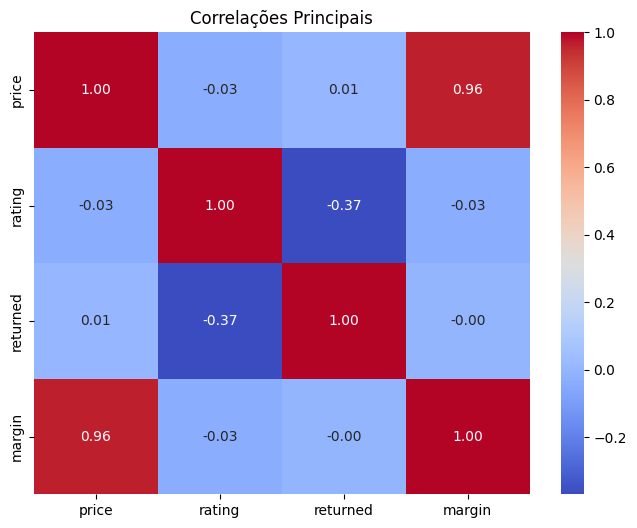

In [5]:

# Converter booleano para int
ecommerce_df['returned'] = ecommerce_df['returned'].astype(int)

# Selecionar apenas as variáveis numéricas principais
numerical_vars = ['price', 'rating', 'returned', 'margin']
correlation = ecommerce_df[numerical_vars].corr()

# Criar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f')
plt.title('Correlações Principais')
plt.show()

## Delivery de Alimentos

In [7]:
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365)]
dates = np.random.choice(dates, size=N_SAMPLES)

# Geração de horários simplificada com distribuição mais realista
def generate_time():
    period = np.random.choice(['lunch', 'dinner'], p=[0.4, 0.6])
    if period == 'lunch':
        hour = np.random.choice(range(11, 15), p=[0.2, 0.4, 0.3, 0.1])
    else:
        hour = np.random.choice(range(18, 23), p=[0.1, 0.2, 0.3, 0.25, 0.15])
    minute = np.random.choice(range(0, 60, 15))
    return time(hour=hour, minute=minute)

# Dados dos restaurantes com características detalhadas
restaurants_info = {
    'Sabor Caseiro': {
        'categoria': 'Brasileira',
        'preco_base': 35,
        'tempo_preparo': 25,
        'capacidade_horario': 50,
        'preco_entrega': 8,
        'avaliacao_base': 4.3
    },
    'Pizza Express': {
        'categoria': 'Pizza',
        'preco_base': 45,
        'tempo_preparo': 30,
        'capacidade_horario': 40,
        'preco_entrega': 7,
        'avaliacao_base': 4.2
    },
    'Burger King': {
        'categoria': 'Hambúrguer',
        'preco_base': 30,
        'tempo_preparo': 15,
        'capacidade_horario': 80,
        'preco_entrega': 6,
        'avaliacao_base': 4.0
    },
    'Sushi House': {
        'categoria': 'Japonesa',
        'preco_base': 60,
        'tempo_preparo': 35,
        'capacidade_horario': 30,
        'preco_entrega': 10,
        'avaliacao_base': 4.4
    },
    'Veggie Life': {
        'categoria': 'Vegetariana',
        'preco_base': 40,
        'tempo_preparo': 20,
        'capacidade_horario': 35,
        'preco_entrega': 8,
        'avaliacao_base': 4.1
    },
    'Taco Feliz': {
        'categoria': 'Mexicana',
        'preco_base': 35,
        'tempo_preparo': 20,
        'capacidade_horario': 45,
        'preco_entrega': 7,
        'avaliacao_base': 4.2
    },
    'Pasta Bella': {
        'categoria': 'Italiana',
        'preco_base': 50,
        'tempo_preparo': 30,
        'capacidade_horario': 40,
        'preco_entrega': 9,
        'avaliacao_base': 4.3
    },
    'Food Box': {
        'categoria': 'Variada',
        'preco_base': 35,
        'tempo_preparo': 25,
        'capacidade_horario': 60,
        'preco_entrega': 7,
        'avaliacao_base': 4.0
    }
}

# Ajustes por região com características detalhadas
region_info = {
    'Centro': {
        'tempo_base': 15,
        'multiplicador_horario_pico': 1.3,
        'taxa_entrega_base': 1.0,
        'densidade_restaurantes': 'Alta',
        'volume_pedidos': 'Alto'
    },
    'Norte': {
        'tempo_base': 25,
        'multiplicador_horario_pico': 1.2,
        'taxa_entrega_base': 1.2,
        'densidade_restaurantes': 'Média',
        'volume_pedidos': 'Médio'
    },
    'Sul': {
        'tempo_base': 20,
        'multiplicador_horario_pico': 1.2,
        'taxa_entrega_base': 1.1,
        'densidade_restaurantes': 'Média',
        'volume_pedidos': 'Alto'
    },
    'Leste': {
        'tempo_base': 30,
        'multiplicador_horario_pico': 1.15,
        'taxa_entrega_base': 1.3,
        'densidade_restaurantes': 'Baixa',
        'volume_pedidos': 'Médio'
    },
    'Oeste': {
        'tempo_base': 25,
        'multiplicador_horario_pico': 1.15,
        'taxa_entrega_base': 1.2,
        'densidade_restaurantes': 'Média',
        'volume_pedidos': 'Médio'
    }
}

# Geração dos dados base
data = {
    'order_id': [f'ORDER_{i:04d}' for i in range(1, N_SAMPLES + 1)],
    'date': sorted(dates),
    'time': [generate_time() for _ in range(N_SAMPLES)],
    'restaurant': np.random.choice(list(restaurants_info.keys()), size=N_SAMPLES),
    'region': np.random.choice(list(region_info.keys()), size=N_SAMPLES)
}

df_delivery = pd.DataFrame(data)

# Função para calcular tempo de entrega
def calculate_delivery_time(row, is_peak_hour):
    restaurant = restaurants_info[row['restaurant']]
    region = region_info[row['region']]
    
    # Tempo base da região
    base_time = region['tempo_base']
    
    # Adicionar tempo de preparo do restaurante
    total_time = base_time + restaurant['tempo_preparo']
    
    # Ajuste para horário de pico
    if is_peak_hour:
        total_time *= region['multiplicador_horario_pico']
    
    # Adicionar variação aleatória
    total_time *= np.random.normal(1, 0.1)
    
    return int(round(total_time))

# Função para calcular valor do pedido
def calculate_order_value(row, items_qty):
    restaurant = restaurants_info[row['restaurant']]
    
    # Valor base por item do restaurante
    base_value = restaurant['preco_base'] * items_qty
    
    # Adicionar taxa de entrega
    delivery_fee = restaurant['preco_entrega'] * region_info[row['region']]['taxa_entrega_base']
    
    # Variação aleatória no valor base
    variation = np.random.normal(1, 0.15)
    
    total = (base_value * variation) + delivery_fee
    return round(max(total, restaurant['preco_base']), 2)

# Gerar dados derivados
df_delivery['items_quantity'] = np.random.randint(1, 6, size=N_SAMPLES)
df_delivery['is_peak_hour'] = df_delivery['time'].apply(
    lambda x: (12 <= x.hour <= 13) or (19 <= x.hour <= 20)
)

# Calcular tempos de entrega
df_delivery['delivery_time'] = df_delivery.apply(
    lambda row: calculate_delivery_time(row, row['is_peak_hour']),
    axis=1
)

# Calcular valores dos pedidos
df_delivery['order_value'] = df_delivery.apply(
    lambda row: calculate_order_value(row, row['items_quantity']),
    axis=1
)

# Gerar avaliações considerando múltiplos fatores
def generate_ratings(row):
    restaurant = restaurants_info[row['restaurant']]
    base_rating = restaurant['avaliacao_base']
    
    # Ajuste baseado no tempo de entrega
    if row['delivery_time'] <= 30:
        delivery_adj = 0.5
    elif row['delivery_time'] <= 45:
        delivery_adj = 0
    elif row['delivery_time'] <= 60:
        delivery_adj = -0.5
    else:
        delivery_adj = -1
    
    # Calcular rating final
    delivery_rating = min(5, max(1, int(round(base_rating + delivery_adj + np.random.normal(0, 0.5)))))
    restaurant_rating = min(5, max(1, int(round(base_rating + np.random.normal(0, 0.5)))))
    
    return pd.Series({
        'delivery_rating': delivery_rating,
        'restaurant_rating': restaurant_rating
    })

ratings = df_delivery.apply(generate_ratings, axis=1)
df_delivery['delivery_rating'] = ratings['delivery_rating']
df_delivery['restaurant_rating'] = ratings['restaurant_rating']

# Adicionar método de pagamento com distribuição realista
def generate_payment_method(order_value):
    if order_value > 100:
        probs = [0.5, 0.2, 0.25, 0.05]  # Maior probabilidade de cartão de crédito
    else:
        probs = [0.3, 0.25, 0.35, 0.1]  # Maior probabilidade de PIX
    
    return np.random.choice(
        ['Credit Card', 'Debit Card', 'PIX', 'Cash'],
        p=probs
    )

df_delivery['payment_method'] = df_delivery['order_value'].apply(generate_payment_method)

# Adicionar categoria do restaurante
df_delivery['restaurant_category'] = df_delivery['restaurant'].map(
    {k: v['categoria'] for k, v in restaurants_info.items()}
)

# Adicionar status de entrega
df_delivery['delivery_status'] = df_delivery['delivery_time'].apply(
    lambda x: 'On Time' if x <= 45 else 'Delayed'
)

# Adicionar detalhes do pedido
df_delivery['has_drinks'] = df_delivery.apply(
    lambda row: np.random.choice([True, False], p=[0.7, 0.3])
    if row['restaurant'] in ['Burger King', 'Pizza Express']
    else np.random.choice([True, False], p=[0.3, 0.7]),
    axis=1
)

df_delivery['is_scheduled'] = df_delivery.apply(
    lambda row: np.random.choice([True, False], p=[0.3, 0.7])
    if row['restaurant_category'] in ['Japonesa', 'Italiana']
    else np.random.choice([True, False], p=[0.1, 0.9]),
    axis=1
)

# Ordenar por data e hora
df_delivery = df_delivery.sort_values(['date', 'time']).reset_index(drop=True)

# Remover colunas auxiliares
df_delivery = df_delivery.drop('is_peak_hour', axis=1)

df_delivery.to_csv('./data/food_delivery.csv', index=False)
df_delivery

,order_id,date,time,restaurant,region,items_quantity,delivery_time,order_value,delivery_rating,restaurant_rating,payment_method,restaurant_category,delivery_status,has_drinks,is_scheduled
0,ORDER_0001,2023-01-01,14:45:00,Sushi House,Sul,2,53,114.40,4,4,Credit Card,Japonesa,Delayed,False,False
1,ORDER_0003,2023-01-01,19:45:00,Food Box,Norte,4,56,145.62,4,4,PIX,Variada,Delayed,False,False
2,ORDER_0002,2023-01-01,20:45:00,Veggie Life,Leste,2,46,90.01,4,4,PIX,Vegetariana,Delayed,True,True
3,ORDER_0006,2023-01-02,11:00:00,Burger King,Norte,1,41,43.68,4,4,Credit Card,Hambúrguer,On Time,True,False
4,ORDER_0008,2023-01-02,11:30:00,Sushi House,Leste,3,56,212.32,5,5,Credit Card,Japonesa,Delayed,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ORDER_1995,2023-12-30,22:45:00,Burger King,Oeste,2,42,59.04,3,4,Credit Card,Hambúrguer,On Time,True,False
1996,ORDER_1999,2023-12-31,11:30:00,Pizza Express,Centro,5,42,211.49,4,4,PIX,Pizza,On Time,True,False
1997,ORDER_1997,2023-12-31,12:00:00,Pizza Express,Centro,4,64,171.67,3,4,Debit Card,Pizza,Delayed,True,False
1998,ORDER_1998,2023-12-31,22:00:00,Veggie Life,Leste,5,58,181.79,4,5,Credit Card,Vegetariana,Delayed,False,False


### Heatmap  - Delivery de Alimentos

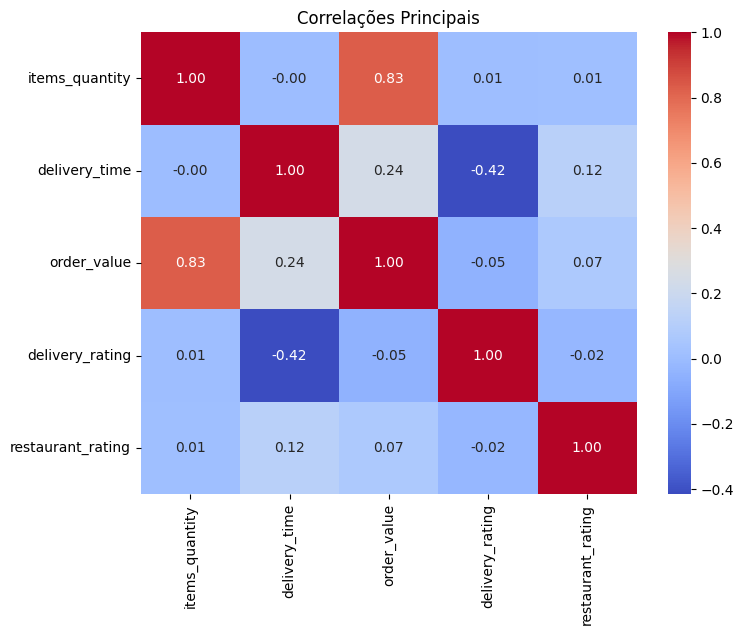

In [10]:

# Selecionar apenas as variáveis numéricas principais
numerical_vars = ['items_quantity', 'delivery_time', 'order_value', 'delivery_rating', 'restaurant_rating']
correlation = df_delivery[numerical_vars].corr()

# Criar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f')
plt.title('Correlações Principais')
plt.show()

## Academia Fitness

In [13]:
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365)]
dates = np.random.choice(dates, size=200)

# Gerar IDs dos membros
member_ids = [f'MEMBER_{i:04d}' for i in range(1, 101)]

# Atividades e suas características (mantido sem alteração)
activities = {
    'Musculação': {
        'categoria': 'Força',
        'calorias_base': 400,
        'duracao_media': 70,
        'intensidade': 'Alta',
        'perfil_idade': 'Todos',
        'distribuicao_genero': {'M': 0.65, 'F': 0.35}
    },
    'Yoga': {
        'categoria': 'Bem-estar',
        'calorias_base': 200,
        'duracao_media': 50,
        'intensidade': 'Baixa',
        'perfil_idade': 'Todos',
        'distribuicao_genero': {'M': 0.3, 'F': 0.7}
    },
    'Spinning': {
        'categoria': 'Cardio',
        'calorias_base': 500,
        'duracao_media': 45,
        'intensidade': 'Alta',
        'perfil_idade': 'Jovem/Adulto',
        'distribuicao_genero': {'M': 0.4, 'F': 0.6}
    },
    'Zumba': {
        'categoria': 'Dança',
        'calorias_base': 350,
        'duracao_media': 55,
        'intensidade': 'Média',
        'perfil_idade': 'Todos',
        'distribuicao_genero': {'M': 0.2, 'F': 0.8}
    },
    'CrossFit': {
        'categoria': 'Funcional',
        'calorias_base': 600,
        'duracao_media': 60,
        'intensidade': 'Muito Alta',
        'perfil_idade': 'Jovem/Adulto',
        'distribuicao_genero': {'M': 0.55, 'F': 0.45}
    },
    'Pilates': {
        'categoria': 'Bem-estar',
        'calorias_base': 250,
        'duracao_media': 50,
        'intensidade': 'Baixa',
        'perfil_idade': 'Todos',
        'distribuicao_genero': {'M': 0.25, 'F': 0.75}
    },
    'Boxing': {
        'categoria': 'Luta',
        'calorias_base': 450,
        'duracao_media': 60,
        'intensidade': 'Alta',
        'perfil_idade': 'Jovem/Adulto',
        'distribuicao_genero': {'M': 0.7, 'F': 0.3}
    },
    'Jump': {
        'categoria': 'Cardio',
        'calorias_base': 400,
        'duracao_media': 45,
        'intensidade': 'Alta',
        'perfil_idade': 'Jovem/Adulto',
        'distribuicao_genero': {'M': 0.3, 'F': 0.7}
    }
}

def generate_time():
    peak_hours = {
        'manha': {'horas': (6, 9), 'prob': 0.3},
        'almoco': {'horas': (11, 14), 'prob': 0.2},
        'noite': {'horas': (17, 22), 'prob': 0.5}
    }
    
    periodo = np.random.choice(
        list(peak_hours.keys()),
        p=[h['prob'] for h in peak_hours.values()]
    )
    
    hora_inicio, hora_fim = peak_hours[periodo]['horas']
    hora = np.random.randint(hora_inicio, hora_fim)
    minuto = np.random.randint(0, 60)
    
    return time(hora, minuto)

def calculate_calories(activity, age, gender, duration):
    base_calories = activities[activity]['calorias_base']
    
    age_factor = 1.0
    if age < 25:
        age_factor = 1.1
    elif age > 50:
        age_factor = 0.9
    
    gender_factor = 1.0 if gender == 'M' else 0.9
    duration_factor = duration / activities[activity]['duracao_media']
    
    return int(base_calories * age_factor * gender_factor * duration_factor)

# Gerar dados base dos membros
member_base = pd.DataFrame({
    'member_id': member_ids,
    'age': np.random.randint(18, 65, size=len(member_ids)),
    'gender': np.random.choice(['M', 'F'], size=len(member_ids)),
    'membership_type': np.random.choice(
        ['Basic', 'Premium', 'VIP'], 
        size=len(member_ids), 
        p=[0.5, 0.3, 0.2]
    )
})

# Gerar dados principais
data = {
    'check_in_id': [f'CHECK_{i:04d}' for i in range(1, 201)],
    'date': sorted(dates),
    'time': [generate_time() for _ in range(200)],
    'member_id': np.random.choice(member_ids, size=200)
}

df_fitness = pd.DataFrame(data)
df_fitness = df_fitness.merge(member_base, on='member_id', how='left')

def generate_activity(age, gender):
    suitable_activities = [
        act for act, props in activities.items()
        if props['perfil_idade'] == 'Todos' or 
        (props['perfil_idade'] == 'Jovem/Adulto' and age < 50)
    ]
    
    probs = [activities[act]['distribuicao_genero'][gender] for act in suitable_activities]
    probs = np.array(probs) / sum(probs)
    
    return np.random.choice(suitable_activities, p=probs)

df_fitness['activity'] = df_fitness.apply(
    lambda row: generate_activity(row['age'], row['gender']),
    axis=1
)

# Correção na geração da duração
def generate_duration(activity):
    mean_duration = activities[activity]['duracao_media']
    duration = int(round(np.random.normal(mean_duration, 10)))
    return max(20, min(120, duration))  # Limita entre 20 e 120 minutos

df_fitness['duration_minutes'] = df_fitness['activity'].apply(generate_duration)

# Calcular calorias
df_fitness['calories_burned'] = df_fitness.apply(
    lambda row: calculate_calories(
        row['activity'],
        row['age'],
        row['gender'],
        row['duration_minutes']
    ),
    axis=1
)

# Categoria da atividade
df_fitness['activity_category'] = df_fitness['activity'].map(
    {k: v['categoria'] for k, v in activities.items()}
)

# Gerar streak com mais realismo
def generate_streak(membership_type):
    base_streak = {
        'VIP': 20,
        'Premium': 15,
        'Basic': 10
    }[membership_type]
    
    streak = int(round(np.random.normal(base_streak, 5)))
    return max(1, min(60, streak))

df_fitness['attendance_streak'] = df_fitness['membership_type'].apply(generate_streak)

# Calcular satisfação
def calculate_satisfaction(row):
    base_score = 4
    
    membership_adj = {'Basic': 0, 'Premium': 0.2, 'VIP': 0.4}
    base_score += membership_adj[row['membership_type']]
    
    base_score += 0.1 if row['attendance_streak'] > 15 else -0.1
    
    expected_duration = activities[row['activity']]['duracao_media']
    if abs(row['duration_minutes'] - expected_duration) > 15:
        base_score -= 0.2
    
    final_score = int(round(base_score + np.random.normal(0, 0.5)))
    return max(1, min(5, final_score))

df_fitness['satisfaction_score'] = df_fitness.apply(calculate_satisfaction, axis=1)

# Status de cancelamento
def generate_cancellation(row):
    base_prob = 0.1
    
    if row['attendance_streak'] > 20:
        base_prob *= 0.5
    if row['satisfaction_score'] <= 2:
        base_prob *= 2
    if row['membership_type'] == 'VIP':
        base_prob *= 0.7
    elif row['membership_type'] == 'Basic':
        base_prob *= 1.2
    
    return np.random.random() < base_prob

df_fitness['cancelled'] = df_fitness.apply(generate_cancellation, axis=1)

# Razões de cancelamento
def generate_cancellation_reason(row):
    if not row['cancelled']:
        return None
    
    reasons = {
        'Mudança de endereço': 0.2,
        'Custo alto': 0.3 if row['membership_type'] != 'VIP' else 0.1,
        'Falta de tempo': 0.25,
        'Insatisfação': 0.4 if row['satisfaction_score'] <= 2 else 0.1,
        'Outros': 0.15
    }
    
    probs = np.array(list(reasons.values()))
    probs = probs / probs.sum()
    
    return np.random.choice(list(reasons.keys()), p=probs)

df_fitness['cancellation_reason'] = df_fitness.apply(
    generate_cancellation_reason, 
    axis=1
)

# Ordenar o DataFrame
df_fitness = df_fitness.sort_values(['date', 'time']).reset_index(drop=True)

df_fitness.to_csv('./data/academia_fitness.csv', index=False)
df_fitness

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
0,CHECK_0001,2023-01-01,07:16:00,MEMBER_0054,56,F,Basic,Yoga,50,162,Bem-estar,5,4,False,None
1,CHECK_0002,2023-01-02,18:47:00,MEMBER_0021,18,F,Premium,CrossFit,64,633,Funcional,22,5,False,None
2,CHECK_0003,2023-01-04,07:54:00,MEMBER_0072,36,M,Premium,Musculação,73,417,Força,16,5,False,None
3,CHECK_0004,2023-01-08,12:10:00,MEMBER_0016,19,F,Basic,Jump,41,360,Cardio,11,4,False,None
4,CHECK_0005,2023-01-12,08:14:00,MEMBER_0059,26,M,Basic,Musculação,81,462,Força,9,5,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CHECK_0196,2023-12-23,12:29:00,MEMBER_0002,55,M,Premium,Pilates,56,252,Bem-estar,19,4,False,None
196,CHECK_0197,2023-12-27,11:47:00,MEMBER_0024,55,M,VIP,Zumba,63,360,Dança,17,4,False,None
197,CHECK_0198,2023-12-27,17:47:00,MEMBER_0074,30,M,Premium,CrossFit,76,760,Funcional,11,3,False,None
198,CHECK_0200,2023-12-30,07:20:00,MEMBER_0022,25,F,Premium,Zumba,55,315,Dança,22,4,False,None


### Heatmap - Academia Fitness

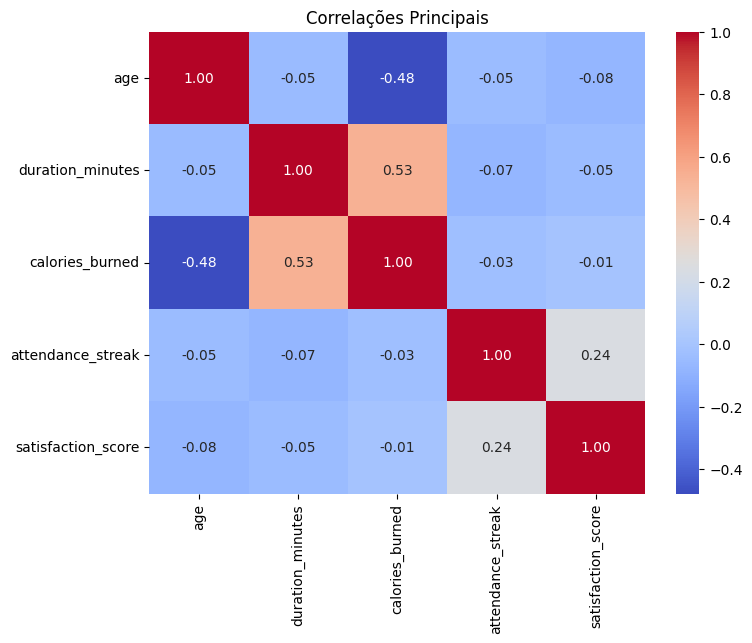

In [14]:
numerical_vars = ['age', 'duration_minutes', 'calories_burned', 'attendance_streak', 'satisfaction_score']
correlation = df_fitness[numerical_vars].corr()

# Criar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f')
plt.title('Correlações Principais')
plt.show()

## Streaming de Música

In [15]:

start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365)]
dates = np.random.choice(dates, size=N_SAMPLES)

# Gêneros e subgêneros com características detalhadas
genres = {
    'Rock': {
        'subgenres': {
            'Classic Rock': {'duracao_media': 280, 'popularidade': 0.8, 'perfil_idade': 'Todos'},
            'Alternative': {'duracao_media': 240, 'popularidade': 0.7, 'perfil_idade': 'Jovem'},
            'Metal': {'duracao_media': 300, 'popularidade': 0.5, 'perfil_idade': 'Jovem'},
            'Indie': {'duracao_media': 220, 'popularidade': 0.6, 'perfil_idade': 'Jovem'}
        },
        'plataforma_preferida': ['Desktop', 'Web'],
        'qualidade_preferida': 'High'
    },
    'Pop': {
        'subgenres': {
            'Pop Internacional': {'duracao_media': 210, 'popularidade': 0.9, 'perfil_idade': 'Todos'},
            'Pop Brasil': {'duracao_media': 200, 'popularidade': 0.85, 'perfil_idade': 'Todos'},
            'K-pop': {'duracao_media': 230, 'popularidade': 0.7, 'perfil_idade': 'Jovem'}
        },
        'plataforma_preferida': ['Mobile', 'Smart TV'],
        'qualidade_preferida': 'High'
    },
    'Electronic': {
        'subgenres': {
            'House': {'duracao_media': 360, 'popularidade': 0.6, 'perfil_idade': 'Jovem'},
            'Techno': {'duracao_media': 400, 'popularidade': 0.5, 'perfil_idade': 'Jovem'},
            'Trance': {'duracao_media': 420, 'popularidade': 0.4, 'perfil_idade': 'Jovem'}
        },
        'plataforma_preferida': ['Desktop', 'Mobile'],
        'qualidade_preferida': 'Ultra'
    },
    'Hip Hop': {
        'subgenres': {
            'Rap': {'duracao_media': 240, 'popularidade': 0.8, 'perfil_idade': 'Jovem'},
            'Trap': {'duracao_media': 180, 'popularidade': 0.7, 'perfil_idade': 'Jovem'},
            'R&B': {'duracao_media': 210, 'popularidade': 0.6, 'perfil_idade': 'Todos'}
        },
        'plataforma_preferida': ['Mobile', 'Smart TV'],
        'qualidade_preferida': 'High'
    },
    'MPB': {
        'subgenres': {
            'Samba': {'duracao_media': 240, 'popularidade': 0.7, 'perfil_idade': 'Adulto'},
            'Bossa Nova': {'duracao_media': 180, 'popularidade': 0.5, 'perfil_idade': 'Adulto'},
            'Forró': {'duracao_media': 200, 'popularidade': 0.6, 'perfil_idade': 'Todos'}
        },
        'plataforma_preferida': ['Smart TV', 'Web'],
        'qualidade_preferida': 'Medium'
    },
    'Jazz': {
        'subgenres': {
            'Bebop': {'duracao_media': 300, 'popularidade': 0.4, 'perfil_idade': 'Adulto'},
            'Swing': {'duracao_media': 250, 'popularidade': 0.5, 'perfil_idade': 'Adulto'},
            'Fusion': {'duracao_media': 320, 'popularidade': 0.4, 'perfil_idade': 'Adulto'}
        },
        'plataforma_preferida': ['Desktop', 'Web'],
        'qualidade_preferida': 'Ultra'
    }
}

# Função para gerar horários com distribuição realista
def generate_times():
    period_weights = {
        'madrugada': {'horas': (0, 6), 'peso': 0.05},
        'manha': {'horas': (6, 10), 'peso': 0.2},
        'dia': {'horas': (10, 17), 'peso': 0.3},
        'noite': {'horas': (17, 23), 'peso': 0.45}
    }
    
    periodo = np.random.choice(
        list(period_weights.keys()),
        p=[p['peso'] for p in period_weights.values()]
    )
    
    hora_inicio, hora_fim = period_weights[periodo]['horas']
    hora = np.random.randint(hora_inicio, hora_fim)
    minuto = np.random.choice(range(0, 60, 15))
    
    return time(hora, minuto)

# Gerar perfis de usuários
user_base = pd.DataFrame({
    'user_id': [f'USER_{i:04d}' for i in range(1, N_CUSTOMERS + 1)],
    'user_age': np.random.randint(16, 65, size=N_CUSTOMERS),
    'subscription_type': np.random.choice(
        ['Free', 'Premium', 'Family'],
        size=N_CUSTOMERS,
        p=[0.4, 0.4, 0.2]
    ),
    'preferred_device': np.random.choice(
        ['Smartphone', 'Computer', 'Tablet', 'Smart Speaker'],
        size=N_CUSTOMERS
    )
})

# Gerar dados principais
data = {
    'play_id': [f'PLAY_{i:04d}' for i in range(1, N_SAMPLES + 1)],
    'date': sorted(dates),
    'time': [generate_times() for _ in range(N_SAMPLES)],
    'user_id': np.random.choice(user_base['user_id'], size=N_SAMPLES)
}

df_streaming = pd.DataFrame(data)
df_streaming = df_streaming.merge(user_base, on='user_id', how='left')

# Função para gerar gênero baseado na idade
def generate_genre(age):
    if age < 25:
        probs = [0.2, 0.3, 0.2, 0.2, 0.05, 0.05]  # Mais Pop e Hip Hop
    elif age < 40:
        probs = [0.25, 0.2, 0.15, 0.15, 0.15, 0.1]  # Mais balanceado
    else:
        probs = [0.2, 0.1, 0.05, 0.05, 0.3, 0.3]  # Mais MPB e Jazz
    
    return np.random.choice(list(genres.keys()), p=probs)

df_streaming['genre'] = df_streaming['user_age'].apply(generate_genre)

# Gerar subgênero baseado no gênero
def generate_subgenre(genre):
    subgenres = list(genres[genre]['subgenres'].keys())
    popularities = [genres[genre]['subgenres'][sub]['popularidade'] for sub in subgenres]
    probs = np.array(popularities) / sum(popularities)
    return np.random.choice(subgenres, p=probs)

df_streaming['subgenre'] = df_streaming['genre'].apply(generate_subgenre)

# Gerar duração baseada no subgênero
def generate_duration(row):
    mean_duration = genres[row['genre']]['subgenres'][row['subgenre']]['duracao_media']
    duration = int(round(np.random.normal(mean_duration, 30)))
    return max(60, min(600, duration))  # Entre 1 e 10 minutos

df_streaming['duration_seconds'] = df_streaming.apply(generate_duration, axis=1)

# Gerar plataforma baseada nas preferências do gênero
def generate_platform(row):
    preferred_platforms = genres[row['genre']]['plataforma_preferida']
    return np.random.choice(preferred_platforms)

df_streaming['platform'] = df_streaming.apply(generate_platform, axis=1)

# Gerar qualidade de stream baseada no tipo de assinatura
def generate_quality(subscription_type):
    if subscription_type == 'Free':
        return np.random.choice(['Low', 'Medium'], p=[0.6, 0.4])
    elif subscription_type == 'Premium':
        return np.random.choice(['Medium', 'High'], p=[0.3, 0.7])
    else:  # Family
        return np.random.choice(['High', 'Ultra'], p=[0.4, 0.6])

df_streaming['stream_quality'] = df_streaming['subscription_type'].apply(generate_quality)

# Gerar modo offline baseado na plataforma e tipo de assinatura
df_streaming['offline_mode'] = df_streaming.apply(
    lambda row: np.random.random() < 0.4 
    if row['subscription_type'] != 'Free' and row['platform'] in ['Mobile', 'Tablet']
    else False,
    axis=1
)

# Gerar interações do usuário
def generate_interactions(row):
    # Base probability
    base_prob = 0.3
    
    # Adjust based on subscription
    if row['subscription_type'] == 'Premium':
        base_prob *= 1.2
    elif row['subscription_type'] == 'Family':
        base_prob *= 1.3
    
    # Adjust based on genre popularity
    genre_popularity = np.mean([
        sub['popularidade'] 
        for sub in genres[row['genre']]['subgenres'].values()
    ])
    base_prob *= genre_popularity
    
    # Generate interactions
    liked = np.random.random() < base_prob
    added_to_playlist = np.random.random() < (base_prob * 0.5)
    share_count = np.random.poisson(base_prob * 2) if liked else 0
    
    return pd.Series({
        'liked': liked,
        'added_to_playlist': added_to_playlist,
        'share_count': share_count
    })

interactions = df_streaming.apply(generate_interactions, axis=1)
df_streaming = pd.concat([df_streaming, interactions], axis=1)

# Gerar status de skip e razões
def generate_skip(row):
    skip_prob = 0.2
    
    # Aumentar probabilidade se a música for muito longa
    if row['duration_seconds'] > 300:
        skip_prob *= 1.2
    
    # Diminuir se o usuário curtiu
    if row['liked']:
        skip_prob *= 0.5
    
    # Aumentar se for free user
    if row['subscription_type'] == 'Free':
        skip_prob *= 1.3
        
    return np.random.random() < skip_prob

df_streaming['skipped'] = df_streaming.apply(generate_skip, axis=1)

def generate_skip_reason(row):
    if not row['skipped']:
        return None
        
    reasons = {
        'Não gostou': 0.3,
        'Música repetida': 0.2,
        'Mudança de humor': 0.2,
        'Interrupção': 0.2,
        'Outro': 0.1
    }
    
    return np.random.choice(
        list(reasons.keys()),
        p=list(reasons.values())
    )

df_streaming['skip_reason'] = df_streaming.apply(generate_skip_reason, axis=1)

# Ordenar o DataFrame
df_streaming = df_streaming.sort_values(['date', 'time']).reset_index(drop=True)

df_streaming.to_csv('./data/music_streaming.csv', index=False)
df_streaming

,play_id,date,time,user_id,user_age,subscription_type,preferred_device,genre,subgenre,duration_seconds,platform,stream_quality,offline_mode,liked,added_to_playlist,share_count,skipped,skip_reason
0,PLAY_0007,2023-01-01,03:30:00,USER_0331,18,Free,Tablet,Pop,K-pop,214,Mobile,Low,False,True,False,0,False,None
1,PLAY_0006,2023-01-01,10:15:00,USER_0445,37,Free,Computer,MPB,Forró,190,Web,Medium,False,False,False,0,False,None
2,PLAY_0008,2023-01-01,11:15:00,USER_0439,21,Premium,Computer,Rock,Alternative,219,Web,Medium,False,False,False,0,False,None
3,PLAY_0001,2023-01-01,13:15:00,USER_0108,16,Premium,Tablet,Electronic,Trance,442,Desktop,High,False,True,False,1,False,None
4,PLAY_0010,2023-01-01,13:45:00,USER_0013,23,Free,Tablet,Rock,Classic Rock,311,Desktop,Low,False,False,False,0,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PLAY_1995,2023-12-30,17:00:00,USER_0392,23,Free,Smartphone,Rock,Indie,243,Web,Low,False,False,False,0,True,Música repetida
1996,PLAY_1997,2023-12-31,06:30:00,USER_0472,54,Family,Smart Speaker,Rock,Indie,191,Desktop,Ultra,False,False,False,0,False,None
1997,PLAY_1998,2023-12-31,10:15:00,USER_0274,52,Free,Computer,Jazz,Swing,316,Desktop,Low,False,False,True,0,False,None
1998,PLAY_1999,2023-12-31,20:45:00,USER_0035,56,Family,Tablet,MPB,Samba,228,Web,High,False,False,True,0,False,None


### Heatmap - Streaming de Música


Principais correlações encontradas:
             var1             var2  correlation
            genre         subgenre    -0.468029
            genre duration_seconds    -0.452748
subscription_type   stream_quality    -0.441478
 duration_seconds         platform    -0.320609


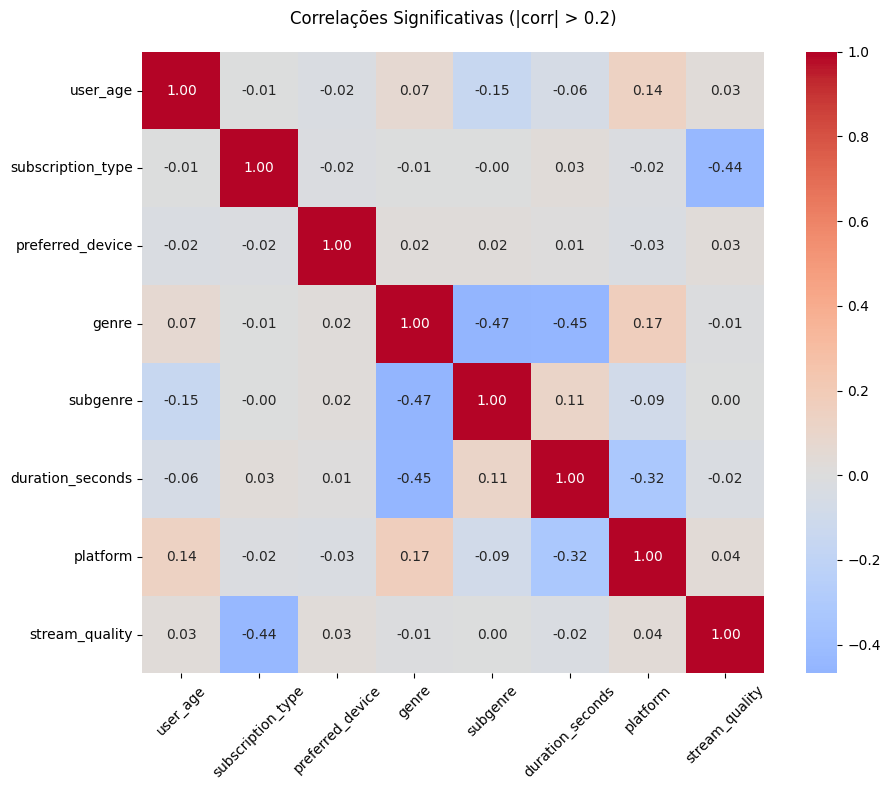

In [17]:
from sklearn.preprocessing import LabelEncoder

# Selecionar colunas
selected_columns = [
    'user_age', 'subscription_type', 'preferred_device',
    'genre', 'subgenre', 'duration_seconds',
    'platform', 'stream_quality'
]

# Preparar dados
df_encoded = df_streaming[selected_columns].copy()

# Label Encoding
for col in df_encoded.select_dtypes(['object']):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Calcular correlações
corr = df_encoded.corr()


# Criar heatmap com correlações filtradas
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True
)

plt.title('Correlações Significativas (|corr| > 0.2)', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Análise das correlações mais importantes
correlations = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i,j]) > 0.2:
            correlations.append({
                'var1': corr.index[i],
                'var2': corr.columns[j],
                'correlation': corr.iloc[i,j]
            })

# Ordenar e mostrar as correlações mais importantes
correlations_df = pd.DataFrame(correlations)
correlations_df = correlations_df.sort_values('correlation', key=abs, ascending=False)

print("\nPrincipais correlações encontradas:")
print(correlations_df.to_string(index=False))